In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [89]:
df = pd.read_csv('ABtestData.csv')

In [90]:
df.shape

(49082, 7)

In [91]:
df.head()

,uid,group,join_dt,device,country,gender,spent
0,1000000,B,2023-01-28,I,CAN,M,0.0
1,1000001,A,2023-01-27,A,BRA,M,0.0
2,1000002,A,2023-02-01,A,FRA,M,0.0
3,1000003,B,2023-01-25,I,BRA,M,0.0
4,1000004,A,2023-02-04,A,DEU,F,0.0


In [92]:
df2 = df.groupby(['uid'], as_index=False)['spent'].agg({'Spent':'sum'})
df2.head()

,uid,Spent
0,1000000,0.0
1,1000001,0.0
2,1000002,0.0
3,1000003,0.0
4,1000004,0.0


In [93]:
df2.shape

(48943, 2)

In [94]:
df.drop_duplicates('uid', inplace=True)

In [95]:
df.shape

(48943, 7)

In [96]:
df3=df2.merge(df, on =['uid'], how = 'inner')
df3.head()

,uid,Spent,group,join_dt,device,country,gender,spent
0,1000000,0.0,B,2023-01-28,I,CAN,M,0.0
1,1000001,0.0,A,2023-01-27,A,BRA,M,0.0
2,1000002,0.0,A,2023-02-01,A,FRA,M,0.0
3,1000003,0.0,B,2023-01-25,I,BRA,M,0.0
4,1000004,0.0,A,2023-02-04,A,DEU,F,0.0


In [97]:
df3.shape

(48943, 8)

In [98]:
df3.drop('spent',axis=1, inplace=True)

In [99]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48943 entries, 0 to 48942
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   uid      48943 non-null  int64  
 1   Spent    48943 non-null  float64
 2   group    48943 non-null  object 
 3   join_dt  48943 non-null  object 
 4   device   48649 non-null  object 
 5   country  48300 non-null  object 
 6   gender   42088 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 3.0+ MB


In [100]:
df3['Convert'] = df3['Spent'].map(lambda x: 1 if x>0 else 0)

In [101]:
df3.Convert.mean()

0.04278446355965102

In [102]:
df3.Spent.mean()

3.382735629887462

In [103]:
df3[df3['group']=='B'].Spent.mean()

3.390866945885783

In [104]:
df3[df3['group']=='A'].Spent.mean()

3.374518467928841

In [105]:
df3[df3['group']=='A'].Convert.mean()

0.03923099042845993

In [106]:
df3[df3['group']=='B'].Convert.mean()

0.04630081300813008

In [107]:
df3.groupby(['group', 'device'])['group'].count()

group  device
A      A         15054
       I          9142
B      A         15235
       I          9218
Name: group, dtype: int64

In [21]:
df3.groupby(['group'])['group'].count()

group
A    24343
B    24600
Name: group, dtype: int64

In [22]:
df3.device.fillna('others', inplace=True)

In [23]:
df3.gender.fillna('not specified', inplace=True)

In [24]:
df3.country.fillna('NULL', inplace=True)

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48943 entries, 0 to 48942
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   uid      48943 non-null  int64  
 1   Spent    48943 non-null  float64
 2   group    48943 non-null  object 
 3   join_dt  48943 non-null  object 
 4   device   48943 non-null  object 
 5   country  48943 non-null  object 
 6   gender   48943 non-null  object 
 7   Convert  48943 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 3.4+ MB


In [108]:
df3['join_dt'] = pd.to_datetime(df3['join_dt']).dt.date

In [109]:
df3.describe()

,uid,Spent,Convert
count,4.894300e+04,48943.000000,48943.000000
mean,1.025001e+06,3.382736,0.042784
std,1.443521e+04,25.674946,0.202373
min,1.000000e+06,0.000000,0.000000
25%,1.012506e+06,0.000000,0.000000
50%,1.024996e+06,0.000000,0.000000
75%,1.037504e+06,0.000000,0.000000
max,1.049999e+06,1659.400000,1.000000


<Axes: >

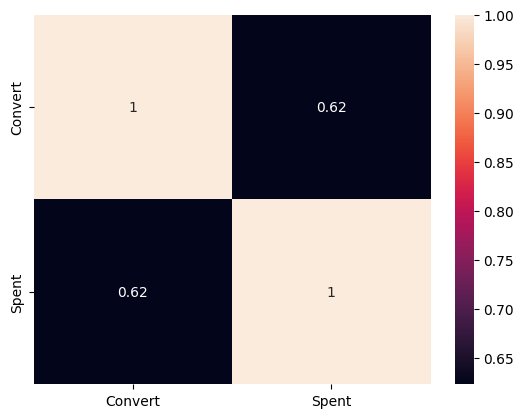

In [28]:
sns.heatmap(df3[['Convert','Spent']].corr(), annot = True)

In [29]:
df3.groupby(['group', 'device'])['Convert', 'Spent'].agg(['mean', 'count'])

<ipython-input-29-0bdf09e5618a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3.groupby(['group', 'device'])['Convert', 'Spent'].agg(['mean', 'count'])


Convert            Spent       
                  mean  count      mean  count
group device                                  
A     A       0.027700  15054  2.312639  15054
      I       0.058521   9142  5.072231   9142
      others  0.020408    147  6.538095    147
B     A       0.035248  15235  2.465895  15235
      I       0.064656   9218  4.918564   9218
      others  0.040816    147  3.456487    147

In [30]:
df3.groupby(['group'])['Convert', 'Spent'].agg(['mean', 'count', 'sum'])

<ipython-input-30-1bb8d21a3cf2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3.groupby(['group'])['Convert', 'Spent'].agg(['mean', 'count', 'sum'])


Convert                  Spent                     
           mean  count   sum      mean  count           sum
group                                                      
A      0.039231  24343   955  3.374518  24343  82145.903065
B      0.046301  24600  1139  3.390867  24600  83415.326869

In [ ]:
# Simulating and plotting distributions

In [31]:
nA = df3[df3['group']=='A']['group'].count()
nB = df3[df3['group']=='B']['group'].count()
nA

24343

In [45]:
nP_A = df3[df3['group']=='A']['Convert'].mean()
nP_B = df3[df3['group']=='B']['Convert'].mean()
print ('A  mean '+ str(nP_A))
print ('B  mean '+ str(nP_B))

A  mean 0.03923099042845993
B  mean 0.04630081300813008


In [33]:
from scipy.stats import binom

In [46]:
x = np.arange(nA * nP_A - 100, nB* nP_B + 100)
binom_a = binom.pmf(x, nA, nP_A)
binom_b = binom.pmf(x, nB, nP_B)


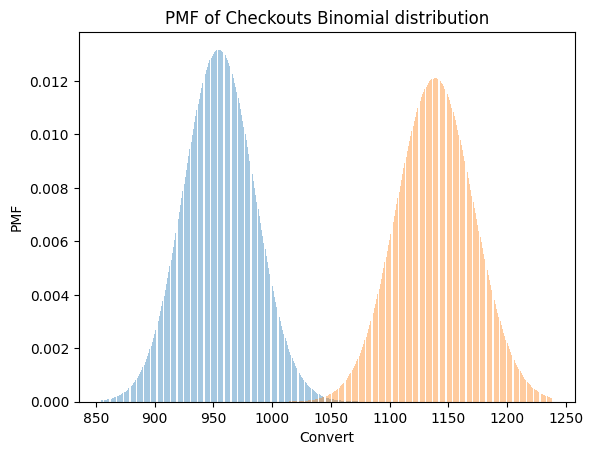

In [47]:
# Plot Binomial distributions A and B
plt.bar(x, binom_a, alpha=0.4, label='Checkout A')
plt.bar(x, binom_b, alpha=0.4, label='Checkout B')
plt.xlabel('Convert')
plt.ylabel('PMF')
plt.title('PMF of Checkouts Binomial distribution')
plt.show()

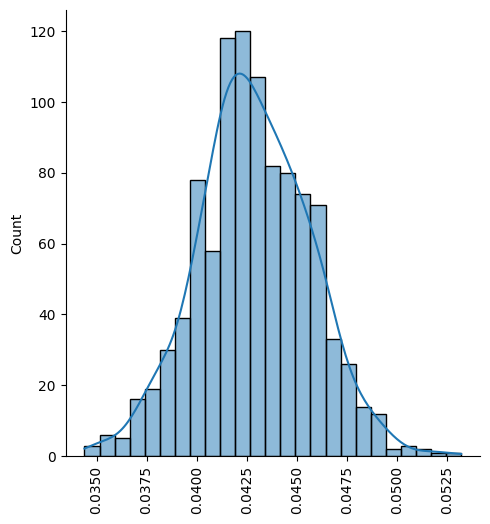

In [44]:
# Set random seed for repeatability
np.random.seed(47)
# Create an empty list to hold means
sampled_means = []
# Create loop to simulate 1000 sample means
for i in range(1000):
  # Take a sample of n=100
  sample1 = df3['Convert'].sample(5000,replace=True)
  # Get the sample mean and append to list
  sample_mean = np.mean(sample1)
  sampled_means.append(sample_mean)
# Plot distribution
sns.displot(sampled_means, kde=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# for spent change here

In [37]:
# nP_A = df3[df3['group']=='A']['Spent'].mean()
# nP_B = df3[df3['group']=='B']['Spent'].mean()
# # print ('A  mean '+ str(nP_A))
# print ('B  mean '+ str(nP_B))

# doesnt work with spent,  not binomial - guess

# ERROR
# nan
# /usr/local/lib/python3.10/dist-packages/statsmodels/stats/proportion.py:586: RuntimeWarning: invalid value encountered in arcsin
#   es = 2 * (np.arcsin(np.sqrt(prop1)) - np.arcsin(np.sqrt(prop2)))



In [48]:
from statsmodels.stats.proportion import proportion_effectsize
effect_size_std = proportion_effectsize(nP_B, nP_A)
print(effect_size_std)

0.034971329736304124


In [68]:
# Small effect = 0.2
# Medium effect = 0.5
# Large effect = 0.8

# negligible effect

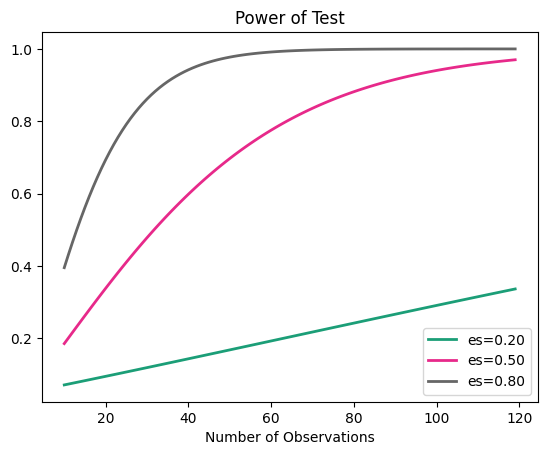

In [54]:
from statsmodels.stats.power import TTestIndPower
# Specify parameters for power analysis
sample_sizes = np.array(range(10, 120))
effect_sizes = np.array([0.2, 0.5, 0.8])
# Plot power curves
TTestIndPower().plot_power(nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

In [55]:
# Import power module
from statsmodels.stats import power
# Calculate sample size
sample_size = power.TTestIndPower().solve_power(effect_size=effect_size_std, power=.80,alpha=.05, nobs1=None)
print(sample_size)


12836.446537686665


In [70]:
# 24k  plus sample size for A, and B , we are in order

In [56]:
meanA = df3[df3['group']=='A']['Convert'].mean()
meanA

0.03923099042845993

In [57]:
stdA = df3[df3['group']=='A']['Convert'].std()
stdA

0.19414805754879985

In [66]:
new_mean = 0.05

In [67]:
# Calculate the standardized effect size
std_effect_size=(new_mean - meanA)/stdA
std_effect_size

0.05546802634805267

In [68]:
sample_size2 = power.TTestIndPower().solve_power(effect_size=std_effect_size, power=.80,alpha=.05, nobs1=None)
print(sample_size2)

5103.086624004948


In [76]:
# minimum A and B population of 5104 for a 1 percent rate increase

Sanity test


In [69]:
# Creat lists of observed and expected counts per variant
observed = [ nA, nB ]
expected = [ (nA+nB)/2, (nA+nB)/2 ]
# Import chisquare from scipy library
from scipy.stats import chisquare
# Run chisquare test on observed and expected lists
chi = chisquare(observed, f_exp=expected)
# Print test results and interpretation
print(chi)
if chi[1] < 0.01:
  print("SRM may be present")
else:
  print("SRM likely not present")


Power_divergenceResult(statistic=1.3495086120589257, pvalue=0.24536404027139797)
SRM likely not present


In [ ]:
# Sanity check passed SRM- (SAMPLE RATIO MISMATCH )

Simpson's paradox

In [70]:
df3.groupby(['group', 'device'])['Spent'].mean()

group  device
A      A         2.312639
       I         5.072231
       others    6.538095
B      A         2.465895
       I         4.918564
       others    3.456487
Name: Spent, dtype: float64

In [72]:
df3.groupby(['group', 'gender'])['Spent'].mean()

group  gender       
A      F                4.462831
       M                2.249476
       O                2.767339
       not specified    3.621754
B      F                4.129919
       M                2.600581
       O                2.769994
       not specified    3.735781
Name: Spent, dtype: float64

In [74]:
df3.groupby('group')['Spent'].mean()

group
A    3.374518
B    3.390867
Name: Spent, dtype: float64

In [ ]:
# paradox dectected for amount Spent by people using other devices appart from andriod and ios on the control group

Novelty Effect

In [110]:
df_novelty = df3.groupby(['group', 'join_dt'], as_index=False).agg({'Convert':'mean', 'Spent':'mean'})
df_novelty.head()

,group,join_dt,Convert,Spent
0,A,2023-01-25,0.039421,3.293230
1,A,2023-01-26,0.038405,3.676776
2,A,2023-01-27,0.040823,3.365801
3,A,2023-01-28,0.047619,3.936973
4,A,2023-01-29,0.036827,2.815459


In [111]:
df_novelty_sum = df3.groupby(['group', 'join_dt'], as_index=False)['Spent'].agg({'Agg_Spent':'sum'})

In [76]:
df_novelty['join_dt'] = pd.to_datetime(df_novelty['join_dt']).dt.date

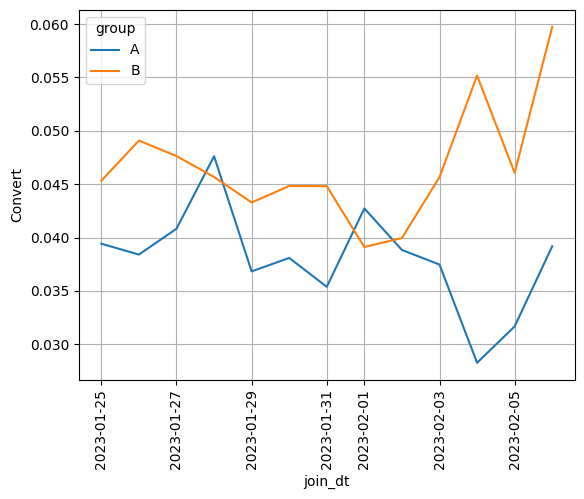

In [77]:
sns.lineplot(x='join_dt', y='Convert', hue='group', data=df_novelty)

plt.xticks(rotation = 90);
plt.grid()

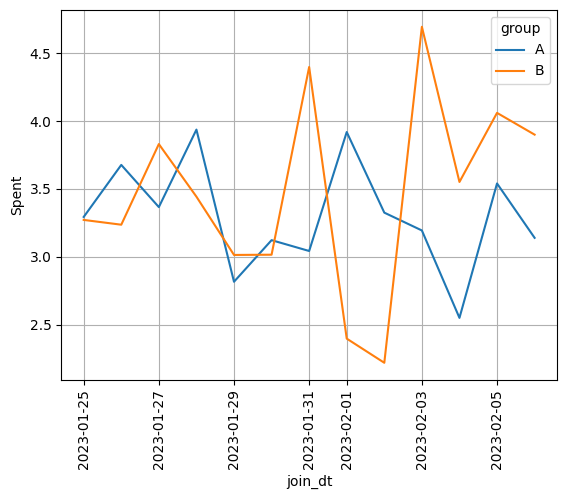

In [78]:
sns.lineplot(x='join_dt', y='Spent', hue='group', data=df_novelty)

plt.xticks(rotation = 90);
plt.grid()

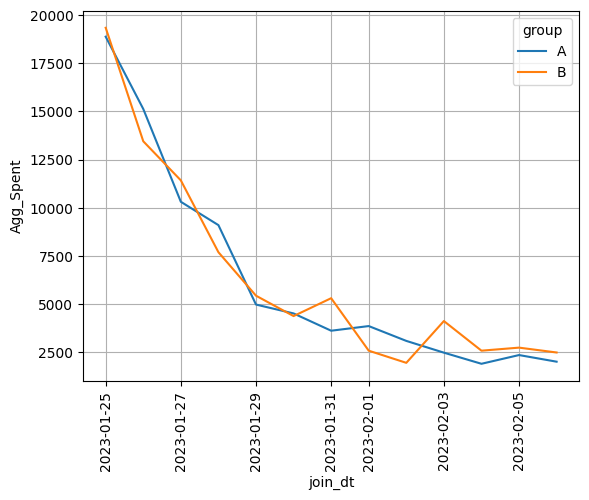

In [112]:
sns.lineplot(x='join_dt', y='Agg_Spent', hue='group', data=df_novelty_sum)

plt.xticks(rotation = 90);
plt.grid()

In [79]:
dd1 = df_novelty[df_novelty['group']=='A']
dd2 = df_novelty[df_novelty['group']=='B']

In [80]:
n_novelty = dd1.merge(dd2, on ='join_dt', how = 'inner')
n_novelty.head()

,group_x,join_dt,Convert_x,Spent_x,group_y,Convert_y,Spent_y
0,A,2023-01-25,0.039421,3.293230,B,0.045324,3.271247
1,A,2023-01-26,0.038405,3.676776,B,0.049086,3.236014
2,A,2023-01-27,0.040823,3.365801,B,0.047635,3.830262
3,A,2023-01-28,0.047619,3.936973,B,0.045678,3.442715
4,A,2023-01-29,0.036827,2.815459,B,0.043285,3.013081


In [81]:
n_novelty['convert_diff'] = n_novelty['Convert_y'] - n_novelty['Convert_x']
n_novelty['Spent_diff'] = n_novelty['Spent_y'] - n_novelty['Spent_x']

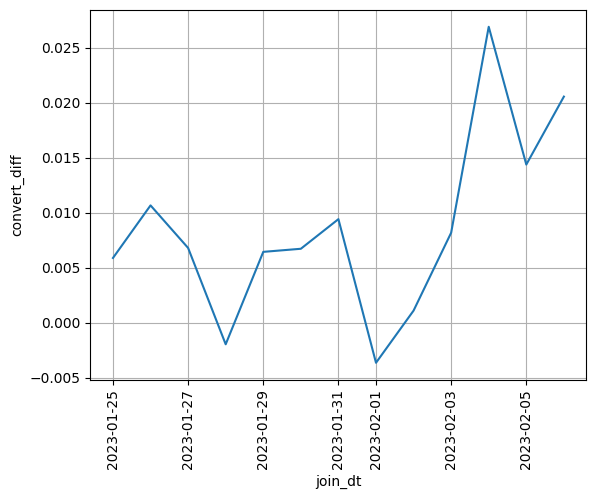

In [82]:
sns.lineplot(x='join_dt', y='convert_diff',  data=n_novelty)
plt.xticks(rotation = 90);
plt.grid()

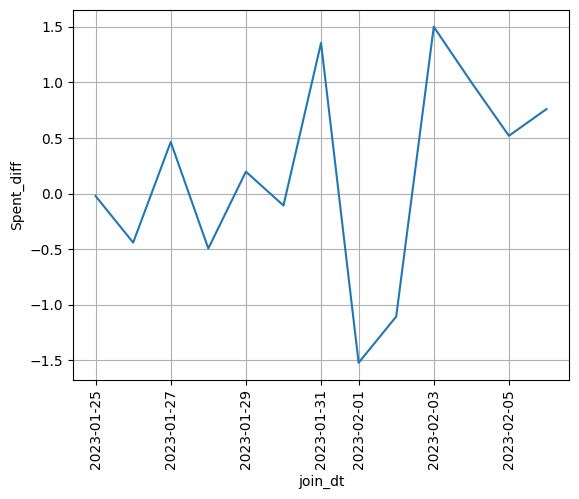

In [83]:
sns.lineplot(x='join_dt', y='Spent_diff',  data=n_novelty)
plt.xticks(rotation = 90);
plt.grid()

Hypothesis Ttest

In [93]:
# !pip install pingouin

In [94]:
import pingouin as pg

In [95]:
ttest_convert = pg.ttest(x=df3[df3['group']=='A']['Convert'], y=df3[df3['group']=='B']['Convert'], paired=False, alternative='two-sided')
ttest_convert

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.866406,48712.312118,two-sided,0.000111,"[-0.01, -0.0]",0.03494,17.919,0.971595


In [96]:
ttest_spent = pg.ttest(x=df3[df3['group']=='A']['Spent'], y=df3[df3['group']=='B']['Spent'], paired=False, alternative='two-sided')
ttest_spent

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.070425,48894.497311,two-sided,0.943856,"[-0.47, 0.44]",0.000637,0.01,0.050568


In [ ]:
# Answering the questions with a validation

<Axes: xlabel='country'>

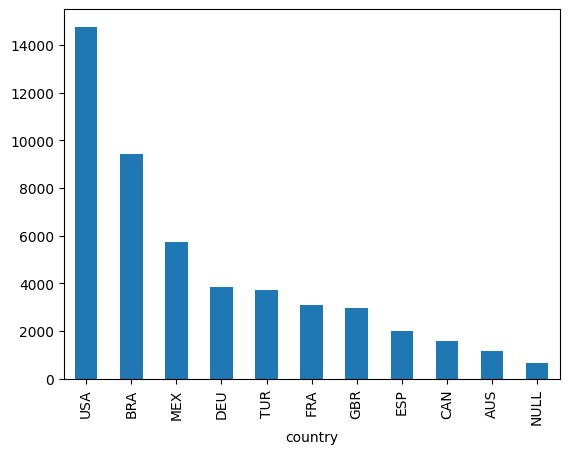

In [97]:
df3.groupby('country')['uid'].count().sort_values(ascending=False).plot(kind='bar')

In [99]:
df3[df3['country']=='USA'].groupby(['group','country'])['Spent'].mean()

group  country
A      USA        4.295363
B      USA        4.053452
Name: Spent, dtype: float64

In [100]:
not_specifiedgender = df3[df3['gender']=='not specified']

In [101]:
not_specifiedgender.groupby('group')['group'].count()  # these are the (not specified) group in tableau

group
A    3412
B    3443
Name: group, dtype: int64

In [84]:
df3.head(2)

,uid,Spent,group,join_dt,device,country,gender,Convert
0,1000000,0.0,B,2023-01-28,I,CAN,M,0
1,1000001,0.0,A,2023-01-27,A,BRA,M,0


In [85]:
df3.rename(columns={'Spent':'spent'}, inplace =True)

In [86]:
df3[['uid','group','join_dt','device','country','gender','spent','Convert']].to_csv('ABtest_final2.csv', index=False)